In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

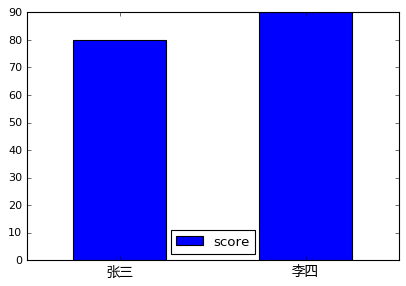

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
ax = df.plot(kind = 'bar', rot = 0) 
labels = [label.decode("utf-8") for label in df.index.values] 
ax.set_xticklabels(labels, fontproperties=font) 
plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.nodropout/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  print('text_ids', text_ids)

  #print('words', words)
  argmax_encode = predictor.inference(['text_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  y = [100.0*n/np.sum(argmaxs) for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  for word, score in zip(words, y):
    print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic/model.ckpt-64.3-82000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic/model.ckpt-64.3-82000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic/model.ckpt-64.3-82000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic/model.ckpt-64.3-82000


text_ids [1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1.00000012] 1.0 1
美女
美女 100.0


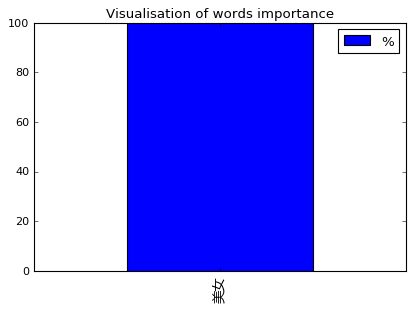

text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.48833126  0.81015551  0.39612412] 1.69461 3
帅哥戴墨镜
帅哥 28.8167199492
戴 47.8077617934
墨镜 23.3755217747


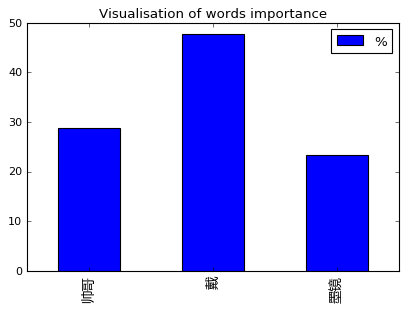

text_ids [3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.18735081  0.4653289   0.18177891  0.24136822  0.16734254  0.3472043
  0.41794056  0.22653151  0.43982029  0.41794056  0.40145421  0.20030804
  0.41794056  0.34528524] 4.45759 14
初中孩子的免费精品课，用手机，在家上，省心
初中 4.2029573116
孩子 10.4390128627
的 4.07795937081
免费 5.4147634815
精品 3.75409942862
课 7.78905009962
， 9.37592062646
用 5.08192224987
手机 9.86676228524
， 9.37592062646
在家 9.00607214994
上 4.49363492102
， 9.37592062646
省心 7.74599861108


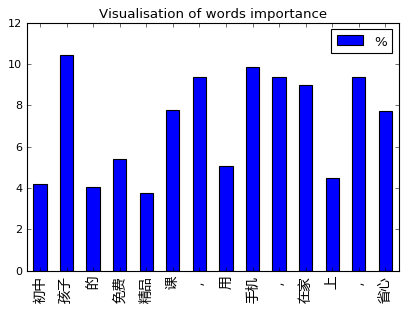

text_ids [17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.19220912  0.24368945  0.24347995  0.3860209   0.21125689  0.39602059
  0.15748282  0.27261758  0.31342211  0.45703265  0.44371229  0.29321671
  0.34351957  0.39602059  0.27693808] 4.62664 15
好用颜值高才是王道，这些手机现在买才实惠
好 4.15440083316
用 5.26709461169
颜 5.2625665854
值 8.34344127679
高 4.56609855541
才 8.55957425538
是 3.40382773622
王道 5.89234615081
， 6.7742938482
这些 9.87828662757
手机 9.5903809378
现在 6.33757490777
买 7.42481911084
才 8.55957425538
实惠 5.98572932561


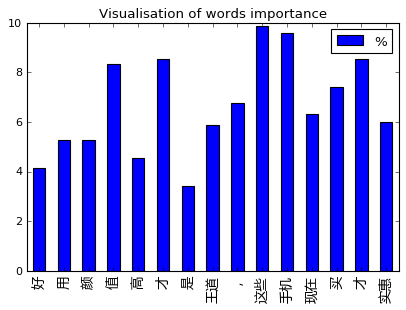

In [7]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

text_ids [243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.11988252  0.35204449  0.4515706   0.37733436  0.12563732  0.31973505
  0.16494747  0.21619144  0.36786708  0.2861591   0.27432853  0.3744812
  0.15637487  0.11157122  0.12652373  0.25107232  0.53965878] 4.61538 17
比信用卡分期更划算！有身份证就能申请10-30万贷款
比 2.5974571228
信用 7.62763783384
卡 9.78403884782
分期 8.1755853869
更 2.72214454383
划算 6.92759925093
！ 3.57386509451
有 4.68415227715
身份 7.97046092561
证 6.20011960756
就能 5.94379038705
申请 8.11376696765
10 3.38812539815
- 2.41737875542
30 2.74135012213
万 5.43990531094
贷款 11.6926179705


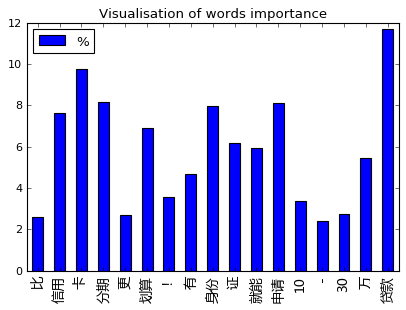

text_ids [4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.35561547  0.22271253  0.28037271  0.28416836  0.22722605  0.21598002
  0.29306674  0.31972778  0.3510344   0.16333708  0.34837571  0.27388537
  0.26723611  0.21447825  0.2423121   0.28488666  0.26965398] 4.61407 17
1890元往返飞旧金山?真是赚了,我一直在这里买!
<NUM> 7.70719794696
元 4.82681358676
往返 6.07647351987
飞 6.15873612152
旧金山 4.92463432959
? 4.68090099061
真 6.35158925241
是 6.9294097343
赚 7.60791326944
了 3.53997881961
, 7.55029179225
我 5.93587442857
一直 5.79176615696
在 4.64835339157
这里 5.25159201687
买 6.17430362826
! 5.84416810789


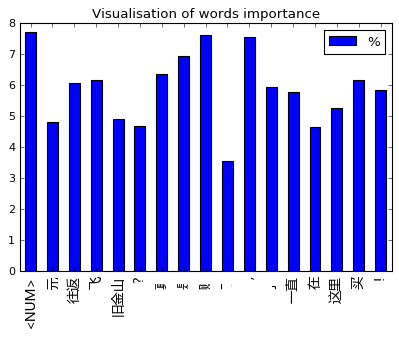

text_ids [14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.21102346  0.1326201   0.19570577  0.28910184  0.48595893  0.36673737
  0.57804251  0.24221519  0.23861066  0.25495219  0.25219029  0.21297866] 3.46014 12
这才是上班族修本科的正确打开方式！
这 6.09870236184
才 3.8327988536
是 5.65601200645
上班 8.35521334275
族 14.0444992709
修 10.598925767
本科 16.7057687499
的 7.0001614774
正确 6.89598840119
打开 7.36826844758
方式 7.28844789937
！ 6.15520868482


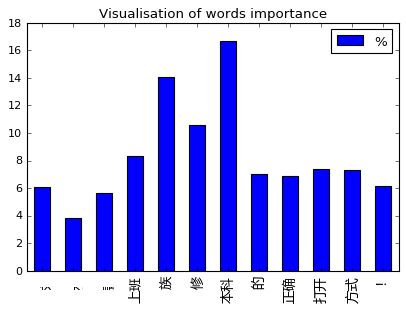

In [8]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

text_ids [19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.12020782  0.24006668  0.29437351  0.15322605  0.17670278  0.47142509
  0.49908161  0.23964822  0.24288289  0.28288788  0.52348804  0.2501424
  0.242809    0.10772829  0.01024605  0.2391554 ] 4.09407 16
国庆到成都不要住酒店啦,这些民宿带你领略别样风情
国庆 2.93614363217
到 5.86376383229
成都 7.19023886866
不 3.74263253431
要 4.31606500607
住 11.5148233031
酒店 12.1903495153
啦 5.85354284763
, 5.93255147399
这些 6.90969573335
民宿 12.786490393
带 6.10986892448
你 5.93074655044
领略 2.63132411142
别样 0.250265533771
风情 5.8415052924


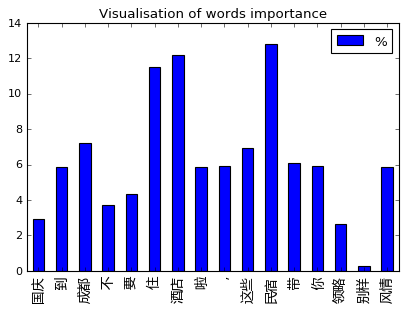

text_ids [8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.35000047  0.340581    0.40935162  0.33276373  0.15563181  0.28693527
  0.35000047  0.46667948  0.59154242] 3.28349 9
低头玩手机?不如低头学英语
低头 10.6594159937
玩 10.3725419222
手机 12.4669808683
? 10.1344636268
不 4.73983422089
如 8.7387379701
低头 10.6594159937
学 14.2129258841
英语 18.0156807973


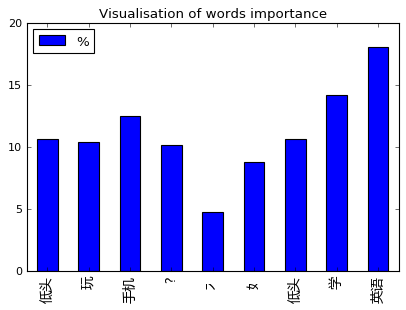

text_ids [6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.06571014  0.30392745  0.28662914  0.33757594  0.20194086  0.21518025
  0.18361807  0.20870881  0.30086243  0.30739588  0.14118603  0.30739343
  0.30392745  0.25179642  0.24807991  0.27541137  0.23265934  0.10218385
  0.17278621  0.16304436  0.15006851  0.05161051  0.30739588  0.22003619
  0.11028475  0.19759499] 5.64701 26
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你
帅哥 1.16362748873
！ 5.38209665754
世界 5.07576966613
名表 5.97796066923
在 3.57606805833
我 3.81051757063
这里 3.25159898958
并 3.6959181276
没 5.32781977997
有 5.44351721555
这么 2.50019157476
贵 5.44347393971
！ 5.38209665754
加 4.45893481

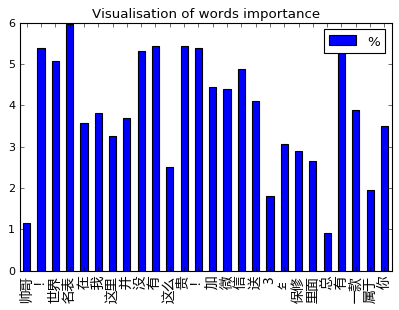

text_ids [2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.19968046  0.58303726  0.07800081  0.1605394   0.07800081  0.7312144
  0.20121843  0.02740917  0.48687959  0.02996508 -0.0033238   0.526124
  0.00719299  0.26083109  0.21554267  0.7312144   0.06236879  0.10382152
  0.27070808  0.4033545   0.48687959  0.09184204  0.23894987] 5.97145 23
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取
精彩 3.34391847196
外教 9.7637446847
一 1.30622875466
对 2.68844868631
一 1.30622875466
英语 12.2451707217
主题 3.36967374777
活动 0.459003490546
课 8.15345489965
, 0.501805687862
让 -0.0556614316463
孩子 8.81065549494
从此 0.120456340237
爱 4.36796811174
上 3.60955258391
英语 12.245170721

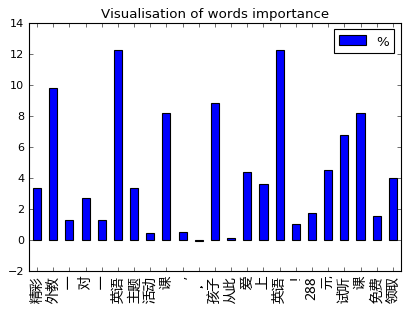

In [9]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

text_ids [2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.36670852  0.20952702  0.52955288  0.11288884  0.1910966   0.28419912
  0.52955288  0.48955834  0.21475701  0.26001388  0.16239634  0.16740099
  0.23697053  0.16174632  0.14971831  0.17659293  0.17969722  0.30322969] 4.72561 18
打工回来学点啥?学厨师当老板,走到哪都不怕！
打工 7.76002927051
回来 4.43386422452
学 11.2060277688
点 2.38887477061
啥 4.04385273448
? 6.01402306304
学 11.2060277688
厨师 10.3596913197
当 4.54453771509
老板 5.5022319165
, 3.43651784802
走 3.54242263391
到 5.01460466653
哪 3.42276261193
都 3.16823430068
不 3.73693615199
怕 3.80262684836
！ 6.41673470183


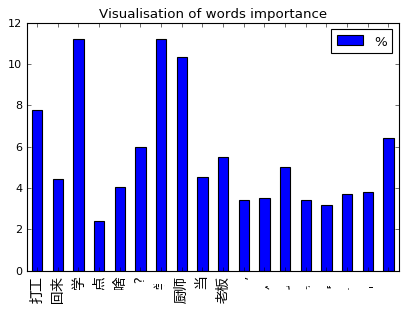

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.37574577  0.45265484  0.35203943  0.3105599   0.26201475  0.48971951
  0.35203943  0.41816312  0.2172192   0.47751385  0.22007246] 3.92774 11
水饺加盟,无需厨师,总部扶持创业!
水饺 9.56645759561
加盟 11.5245562986
, 8.96289588703
无 7.90683039434
需 6.67087467488
厨师 12.4682198966
, 8.96289588703
总部 10.6463998979
扶持 5.53038370309
创业 12.157464752
! 5.60302746231


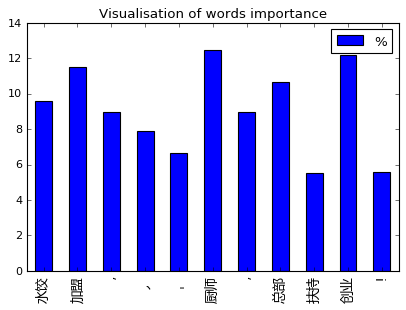

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.38592792  0.45114452  0.3224085   0.30381316  0.26878604  0.51381171
  0.3224085   0.41376334  0.24327224  0.48074624] 3.70608 10
水饺加盟,无需厨师,总部扶持创业
水饺 10.4133659143
加盟 12.1730839897
, 8.69944235995
无 8.19769047909
需 7.25256532305
厨师 13.8640121777
, 8.69944235995
总部 11.1644401251
扶持 6.56413490975
创业 12.9718175365


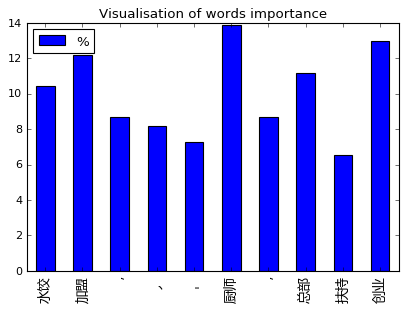

In [10]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.32812473  0.44808137  0.3826814   0.2949335   0.19657184  0.45450655
  0.23758633  0.15695643  0.19598913  0.22374156  0.5347237   0.17663443
  0.25760251] 3.88813 13
iPhone隐藏功能：高铁也能在线选座了！
iphone 8.43913280545
隐藏 11.5243316276
功能 9.84229117919
： 7.58547807142
高 5.05568681175
铁 11.6895824464
也 6.11055014795
能 4.03680693657
在线 5.04069993076
选 5.75447250993
座 13.7527100941
了 4.54291089908
！ 6.62535190523


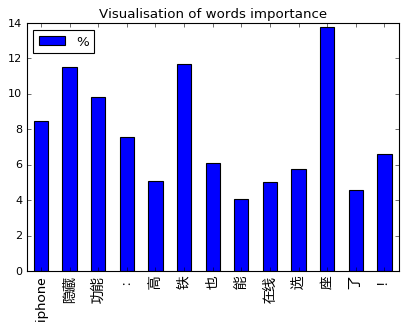

In [11]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

text_ids [4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.08433268  0.24980077  0.15258741  0.70803374  0.25446209  0.33732435
  0.21379194  0.03743816  0.27542961  0.24681611  0.33732435  0.23800786
  0.21405041  0.35612595  0.21871446  0.70803374  0.24315426] 4.87543 17
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀
携手 1.72974940836
欧歌 5.12366884858
步入 3.12972363574
音乐 14.5224948611
殿堂 5.21927731423
, 6.91886682036
领略 4.38509088404
ta 0.767894917098
的 5.64934241856
神奇 5.0624504683
, 6.91886682036
让 4.88178416175
心灵 4.39039248128
插 7.3045068259
上 4.4860568787
音乐 14.5224948611
翅膀 4.98734206216


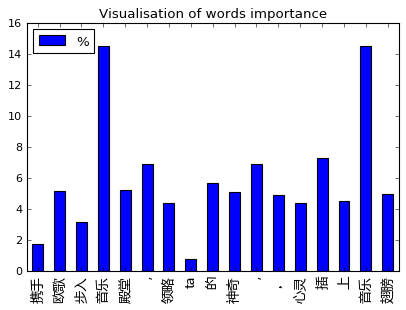

In [12]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

text_ids [949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.29209515  0.25346851  0.5262233   0.17179064  0.39239174  0.40440661
  0.33238199  0.06315692  0.39239174  0.28715307  0.24706379  0.23588178
  0.12245949  0.29346633  0.13816139  0.20093298  0.20223086  0.17188968
  0.17988005] 4.90743 19
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.
底价 5.95210527149
预订 5.16499932275
酒店 10.7230005039
服务 3.50062637138
, 7.99587708172
交通 8.24070738926
便利 6.77304154216
设 1.28696630841
, 7.99587708172
施 5.85139892483
齐 5.03448838171
全 4.80662940949
  2.49539145594
欢迎 5.98004609188
您 2.81535359649
的 4.09446794469
光 4.12091513453
临 3.50264439712
. 3.66546652334


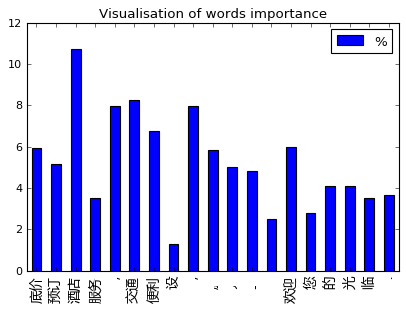

In [13]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

text_ids [8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.27249801  0.64782542  0.24323797  0.32908773  0.4326534   0.46854687
  0.20446421  0.21774805  0.10672095  0.21774805  0.64782542  0.46854687] 4.2569 12
巨人游泳五星级酒店培训,一对一游泳培训
巨人 6.40132112788
游泳 15.2182341567
五 5.71396599134
星级 7.73068490929
酒店 10.1635726337
培训 11.0067554035
, 4.80312158214
一 5.11517555222
对 2.50700948163
一 5.11517555222
游泳 15.2182341567
培训 11.0067554035


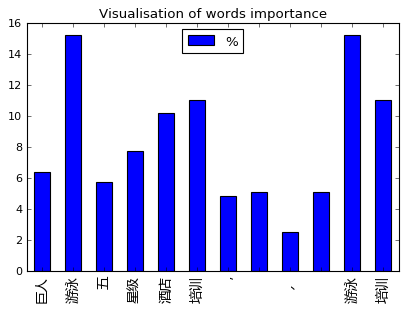

In [14]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

text_ids [1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.16374445  0.36468706  0.12685204  0.03197188  0.62040722  0.10533291
  0.12884943  0.34112102  0.2673026   0.68415093  0.12319501  0.62040722
  0.41032642  0.21048549  0.37251171  0.20107451  0.68415093  0.14893842
  0.21962003  0.2086598   0.16519059  0.29963151] 6.49861 22
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！
为什么 2.51968382608
妈妈 5.61176929723
都 1.95198690986
让 0.491980143284
孩子 9.54676662821
来 1.6208526937
vip 1.98272265259
jr 5.2491373823
学 4.11322671299
英语 10.5276487087
？ 1.89571302851
孩子 9.54676662821
大胆 6.31406346592
开口 3.23893042743
流利 5.73217440195
说 3.09411521381
英语 10.52764870

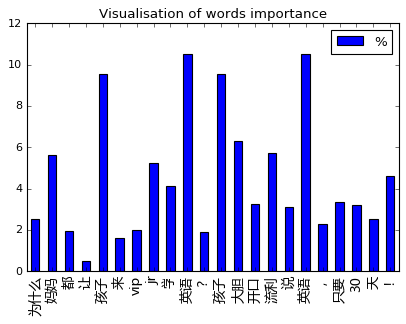

In [15]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')

text_ids [4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.31986514  0.29872489  0.24816674  0.22553627  0.28042105  0.36117709
  0.35822648  0.19110832  0.34777957  0.28372842  0.3242532   0.2029227
  0.28170574  0.29430777  0.2968148 ] 4.31474 15
往返飞旧金山?真是赚了,我一直在这里买!
往返 7.41331494645
飞 6.92336060293
旧金山 5.75160587278
? 5.22711361912
真 6.49914387895
是 8.37077625399
赚 8.30239183428
了 4.42919834446
, 8.06027040241
我 6.57579678631
一直 7.5150143745
在 4.70301299794
这里 6.52891830859
买 6.82098773277
! 6.87909162703


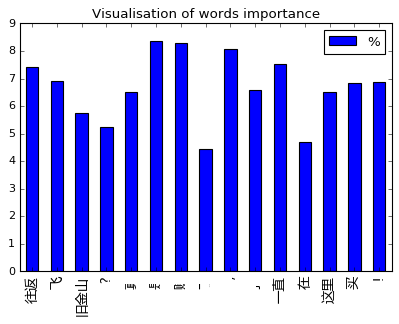

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

text_ids [8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.21966022  0.30249596  0.59859371  0.58103907  0.18998507  0.26164585
  0.20899412  0.51743543  0.31256932] 3.19242 9
不要住酒店，这里的民宿好
不 6.88068312301
要 9.47544711622
住 18.7504756357
酒店 18.200590367
， 5.95113228367
这里 8.19584988023
的 6.5465758898
民宿 16.2082565501
好 9.79098728713


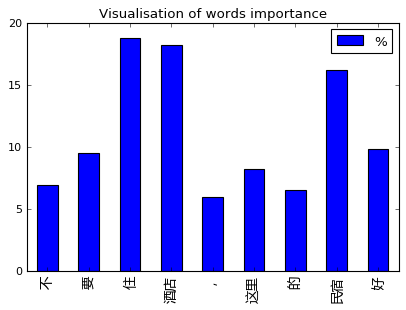

In [17]:
predict('不要住酒店，这里的民宿好')

text_ids [8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.21966022  0.30249596  0.59859371  0.51743549  0.18998507  0.26164582
  0.20899412  0.58103907  0.31256932] 3.19242 9
不要住民宿，这里的酒店好
不 6.88068260914
要 9.47544640857
住 18.7504742354
民宿 16.2082572067
， 5.95113183922
这里 8.1958483346
的 6.54657540088
酒店 18.2005890078
好 9.79098655591


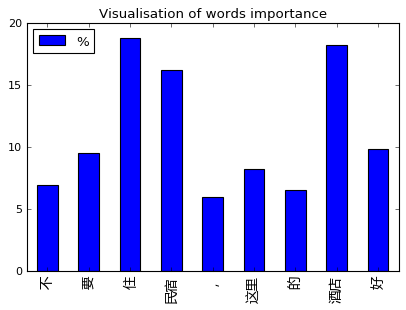

In [18]:
predict('不要住民宿，这里的酒店好')

text_ids [247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.32209477  0.26189995  0.21685651  0.32858235  0.26604307  0.28753293
  0.17909315  0.15524347  0.1847223   0.30152813  0.3022002   0.28753293
  0.383174    0.26464516  0.11732996  0.28969529  0.4062818   0.30152813] 4.85598 18
男神开车专用墨镜，怎么能少了它，降价后就快抢完了
男 6.63294513105
神 5.39334430966
开车 4.46575812494
专用 6.76654478606
墨镜 5.47866416817
， 5.92120800056
怎么 3.68809173391
能 3.19695173049
少 3.8040136936
了 6.20941322915
它 6.22325331065
， 5.92120800056
降价 7.89075881477
后 5.44987684776
就 2.41619309297
快抢 5.96573794571
完 8.3666210891
了 6.20941322915


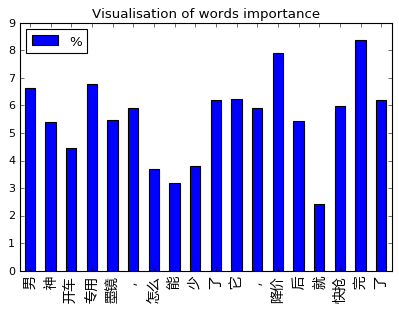

In [19]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

text_ids [59, 5, 22092, 5705, 3781, 914, 326, 133, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[59, 5, 22092, 5705, 3781, 914, 326, 133, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.22134104  0.3448928   0.25247341  0.34117916  0.3623001   0.37071452
  0.35020453  0.28488132  0.2519865   0.32101637  0.30504274  0.3448928
  0.34683418  0.33940127  0.33390221] 4.77106 15
我的家乡惠州越来越热?选一款喜欢的墨镜很重要
我 4.63923973809
的 7.22884628915
家乡 5.29176457807
惠州 7.15100959518
越来 7.59369786692
越 7.77006145232
热 7.34017845328
? 5.97102432887
选 5.28155908805
一款 6.72840373893
喜欢 6.39360145134
的 7.22884628915
墨镜 7.26953707328
很 7.11374562697
重要 6.99848692898


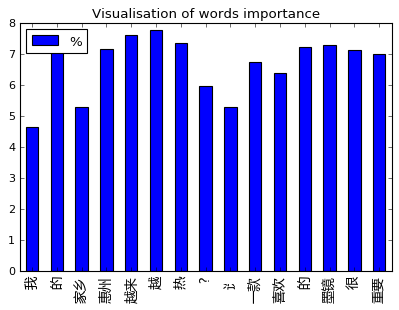

In [20]:
predict('我的家乡惠州越来越热?选一款喜欢的墨镜很重要')

text_ids [38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.33947349  0.46027574  0.41085944  0.26294628  0.33935255  0.46007228
  0.47826952] 2.75125 7
选一款喜欢的墨镜很重要
选 12.3388848949
一款 16.7296993841
喜欢 14.9335588673
的 9.55734097163
墨镜 12.3344891528
很 16.7223041817
重要 17.3837214643


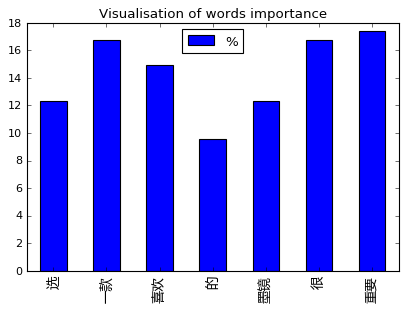

In [21]:
predict('选一款喜欢的墨镜很重要')

text_ids [10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.101188    0.24987599  0.37061819  0.4295969   0.16371389  0.45246005
  0.22705583  0.09056189  0.30269051  0.19352719  0.32200348  0.25857887
  0.323827    0.31806058  0.27558273] 4.07934 15
asics助力#{地域}鸟巢半马 推限量版跑鞋
asics 2.48049882653
助力 6.12540105211
# 9.08524686388
{ 10.5310369447
地域 4.0132435595
} 11.091498794
鸟 5.56599304582
巢 2.22001275599
半 7.42008355817
马 4.74407986419
  7.89351733338
推 6.33874125394
限量 7.93821854196
版 7.79686184614
跑鞋 6.75556996039


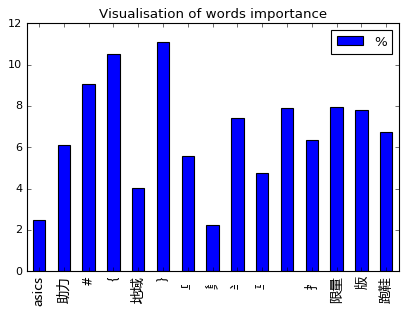

In [22]:
predict('asics助力#{地域}鸟巢半马 推限量版跑鞋')

text_ids [365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.24242483  0.28601754  0.18674304  0.65853322  0.29365528  0.06095035
  0.07702731  0.65853322  0.24527676  0.2012427   0.27890298  0.65853322
  0.29129192  0.22120449  0.65853322  0.25536504  0.11416057  0.65853322
  0.10152366  0.24224824  0.14236438] 6.53306 21
10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询
10 3.71073663968
套 4.37799936208
起订 2.85842924297
, 10.0800042771
7 4.49490833767
天 0.932951803832
到货 1.17903783019
, 10.0800042771
有 3.75439047306
现货 3.08037200119
供应 4.26909856921
, 10.0800042771
精选 4.45873306581
面料 3.38592214851
, 10.0800042771
质量 3.90880926557
上乘 1.74742755092
, 10.0800042771
欢迎 

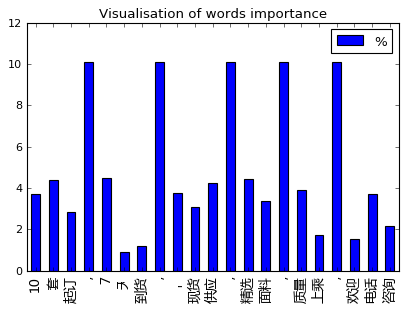

In [23]:
predict('10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询')

text_ids [482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.21553981  0.31079638  0.31764331  0.28131539  0.26416638  0.60056949
  0.27779615  0.16170661  0.50176156  0.31439269  0.43826488  0.31079638] 3.99475 12
牛！亲闺密语内衣竟然用她做模特！
牛 5.39557892211
！ 7.78012365124
亲 7.95152203586
闺 7.04212993108
密语 6.61284130469
内衣 15.0339745476
竟然 6.95403334728
用 4.0479796857
她 12.5605290062
做 7.87014948801
模特 10.9710252465
！ 7.78012365124


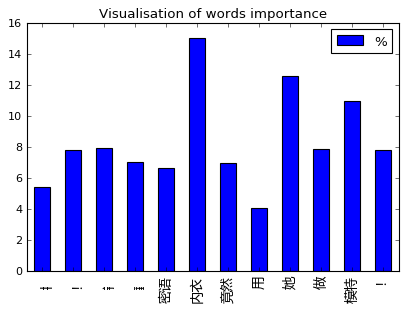

In [24]:
predict('牛！亲闺密语内衣竟然用她做模特！')

text_ids [1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.41801772  0.4539302   0.41998047  0.3441354   0.25745746  0.42270118
  0.57023633  0.46394727  0.25745746  0.1057032   0.13175349  0.32226017
  0.29881364  0.17414984] 4.64054 14
室内净化生意火爆，除甲醛加盟，让你赚大钱！
室内 9.0079455744
净化 9.78183072068
生意 9.05024128315
火爆 7.41584117924
， 5.54800131053
除 9.10887047344
甲醛 12.2881341999
加盟 9.99769046254
， 5.54800131053
让 2.27781905372
你 2.839181734
赚 6.94444751281
大钱 6.43919364582
！ 3.75278901599


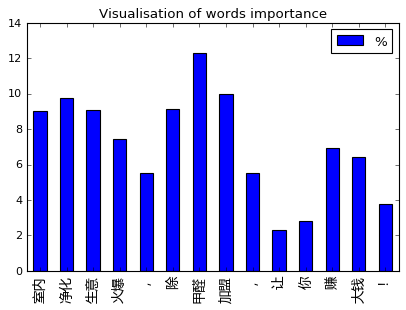

In [25]:
predict('室内净化生意火爆，除甲醛加盟，让你赚大钱！')

text_ids [1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.12987837  0.15579106  0.39193767  0.36793637  0.22612719  0.42472965
  0.17689075  0.32715392  0.19335806  0.42472965  0.34135449  0.21588144
  0.27262393  0.17061388  0.42472965  0.18037131  0.21658279  0.23026136
  0.34135449  0.22744827  0.3621152 ] 5.80187 21
25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！
25 2.23856058273
年 2.68518706293
西服 6.75536821621
定制 6.3416860607
经验 3.8974881801
， 7.32056483212
一 3.04885751914
套 5.63876695791
起订 3.33268529036
， 7.32056483212
免费 5.88352543267
上门 3.72089415876
量 4.69889764069
身 2.94067065914
， 7.32056483212
15 3.10884798095
天 3.73298255388
交货 3.96874388479
免费 5.8835254326

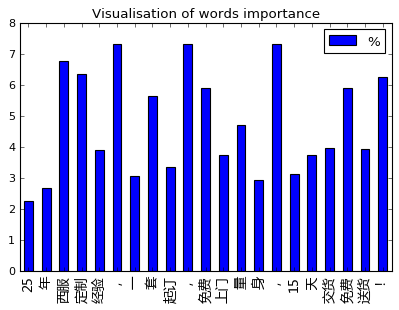

In [26]:
predict('25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！')

text_ids [1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.45370552  0.11396785  0.36965317  0.36965317  0.1835203   0.28073502
  0.23412132  0.50169647  0.29328546  0.08114749  0.28381836  0.32189417
  0.02574449  0.25331378  0.28280076  0.19338886] 4.24245 16
时尚日记--我的欧美女装买手电商,七天包邮退换
时尚 10.6944325335
日记 2.68637131178
- 8.71320860815
- 8.71320860815
我 4.32581356424
的 6.61729152144
欧美 5.51854580179
女装 11.8256419484
买 6.91312188844
手电 1.9127525246
商 6.68997007324
, 7.58746659287
七天 0.606831398208
包 5.97093712143
邮 6.66598390321
退换 4.55842848374


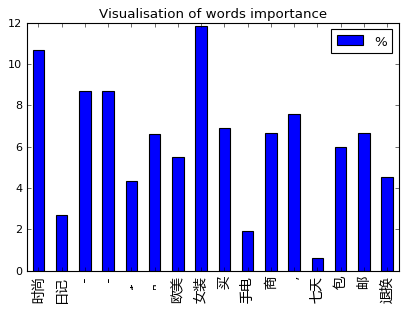

In [27]:
predict('时尚日记--我的欧美女装买手电商,七天包邮退换')

text_ids [1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.41972142  0.32119438  0.25366396  0.1695209   0.4505744   0.30436262
  0.51328981  0.30728227  0.11837608  0.16504323  0.2623288   0.32306197
  0.19246529  0.23613682  0.24389623  0.24417225  0.21058384  0.19486783] 4.93054 18
素颜胜带妆,护肤哪家强?[您的品牌]正品特卖
素 8.51268329617
颜 6.51438282101
胜 5.14474793077
带 3.43817981719
妆 9.1384354652
, 6.17300542954
护肤 10.410413501
哪 6.23222090975
家 2.40087350253
强 3.34736495677
? 5.32048614442
[ 6.55226085425
您 3.90353212146
的 4.78926706773
品牌 4.9466413924
] 4.95223944246
正品 4.27100785621
特卖 3.9522599089


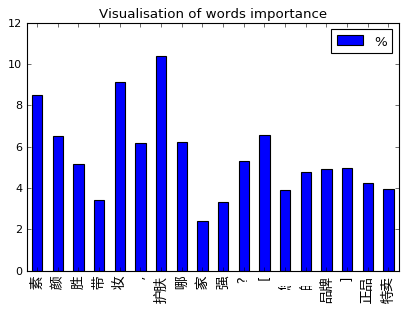

In [28]:
predict('素颜胜带妆,护肤哪家强?[您的品牌]正品特卖')

text_ids [1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.26970118  0.47231719  0.41945916 -0.0040786   0.2680859   0.15922856
  0.18959785  0.24501896  0.37277627 -0.10419174  0.24383484  0.45985228
  0.31178001  0.18379728  0.1774919   0.22308573  0.20918794  0.24975836
  0.25560513] 4.60231 19
口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!
口碑 5.86012858821
美 10.2626152124
妆 9.1141040372
国货 -0.0886206787584
照样 5.82503128969
让 3.45975440698
你 4.11962506242
肌肤 5.32382762072
水 8.09976750306
当当 -2.26390170322
, 5.29809877545
圣诞 9.99177479916
礼盒 6.7744268132
特卖 3.99358917408
低 3.85658440861
至 4.84725746342
1 4.54528309144
折起 5.42680646184
! 5.55384637899


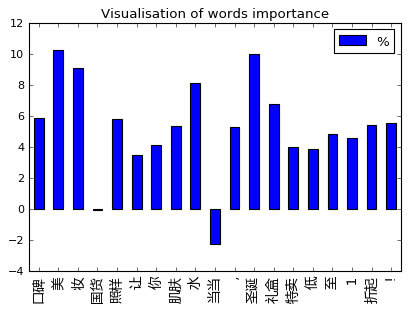

In [29]:
predict('口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!')

text_ids [79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.11957325  0.58276236  0.18951273  0.06290517  0.00734777  0.22595581
  0.13592748  0.18068437  0.1995548   0.23462257  0.24250457  0.19206086
  0.58276236  0.22494757  0.54494703  0.21909575  0.19870973  0.23462257
  0.19379632  0.09979504  0.21274439  0.1039793   0.11545791  0.13752493
  0.21059272] 5.45239 25
找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！
找 2.19304394776
房 10.6882054592
费 3.47577525354
时 1.15371792542
费力 0.13476243683
？ 4.14416292032
来 2.49299022868
中原 3.31385798092
网 3.65995276569
， 4.30311629689
海量 4.44767680836
二手 3.5225094309
房 10.6882054592
/ 4.12567116053
租房 9.99464995581
信息

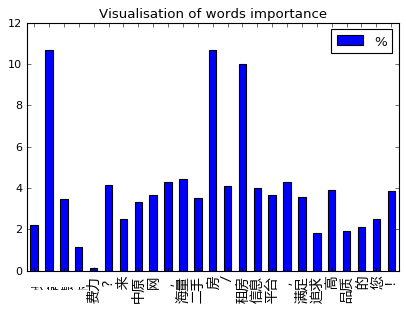

In [30]:
predict('找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！')

text_ids [399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.29655966  0.35230345  0.2921868   0.29652709  0.26628074  0.20440897
  0.16227035  0.12391244  0.30266741  0.37002924  0.37858301  0.35827422
  0.30266741  0.18532196  0.19372995  0.17471263  0.35827422  0.1964035
  0.19629177  0.30193627  0.12346884  0.23533058] 5.67214 22
【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！
【 5.22835526531
装修 6.21111975689
福利 5.15126153172
】 5.22778098585
国际 4.69453702504
大师 3.60373601312
为 2.86083092322
您 2.18457981785
免费 5.33603502834
设计 6.52362603561
家 6.67442929967
, 6.31638470894
免费 5.33603502834
测量 3.26723136815
出 3.41546456087
图 3.08018860073
, 6.31638470894
仅 3.46259934877
限 3

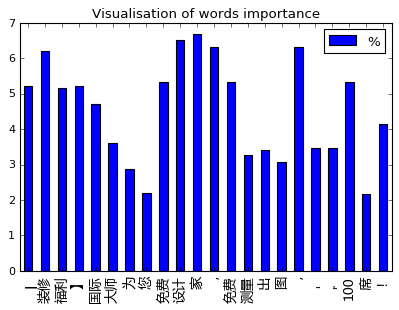

In [31]:
predict('【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！')

text_ids [105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0.31831399  0.41004914  0.49892139  0.4764666   0.31809771  0.20166235
  0.35189539  0.33804137  0.31843847  0.20944197  0.15608874  0.1781586
  0.30240706] 4.07798 13
专业电视机维修,让它三生三世都陪你!
专业 7.80567240402
电视 10.0551951848
机 12.234514128
维修 11.6838792
, 7.80036891308
让 4.94514939226
它 8.6291531954
三生 8.28942575844
三世 7.80872499898
都 5.13592086493
陪 3.82759671545
你 4.36879213122
! 7.41560382477


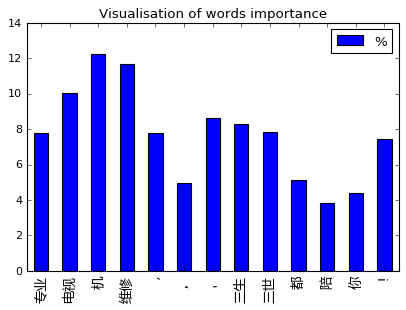

In [32]:
predict('专业电视机维修,让它三生三世都陪你!')